# Cruise 1 section

In [29]:
import os
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import gsw
from seabird.cnv import fCNV

from cast_to_xarray import *

In [30]:
data_dir = 'data_cruise1'

castxr4 = cast_to_xarray(data_dir+'/Station4_TSwift_loop_filter_teos10_bin.cnv', 4)
castxr5 = cast_to_xarray(data_dir+'/Station5_loop_filter_teos10_bin.cnv', 5)
castWF = cast_to_xarray(data_dir+'/StationWF_loop_filter_teos10_bin.cnv', 1)
castRace = cast_to_xarray(data_dir+'/TheRace_loop_filter_teos10_bin.cnv', 2)

In [31]:
# combine all the casts into one xarray dataset
ctdsection = xr.concat([cast4xr,cast5xr,castWFxr, castRacexr],"cast")
#ctdsection

In [32]:
# calculate distance
d = gsw.distance(ctdsection.longitude.values,ctdsection.latitude.values)/1e3 # km
dist = np.cumsum(np.hstack([0,d]))

# add distance coordinate
ctdsection = ctdsection.assign_coords({'distance' : xr.DataArray(dist, coords=[ctdsection.station], dims='cast')})

ctdsection.distance.attrs['units'] = 'km'
ctdsection

<xarray.Dataset>
Dimensions:       (cast: 4, depth: 159)
Coordinates:
  * depth         (depth) float64 1.5 2.0 2.5 3.0 3.5 ... 80.0 80.5 81.0 81.5
    latitude      (cast) float64 41.3 41.14 41.05 41.25
    longitude     (cast) float64 -71.84 -71.65 -71.47 -72.09
    station       (cast) object 4 5 'WF' 'Race'
  * cast          (cast) object 4 5 'WF' 'Race'
    distance      (cast) float64 0.0 23.7 41.86 98.62
Data variables:
    temperature   (cast, depth) float64 nan nan 0.9262 nan ... 19.15 19.15 19.15
    salinity      (cast, depth) float64 nan nan 1.558 nan ... 31.71 31.71 31.71
    fluorescence  (cast, depth) float64 nan nan 0.0908 nan ... 1.152 1.097 1.164

In [33]:
# add units for others
ctdsection.depth.attrs['units'] = 'm'
ctdsection.temperature.attrs['units'] = 'degree C'
ctdsection.salinity.attrs['units'] = 'psu'

# PLotting sections

Text(0.5, 1.0, 'Temperature Section')

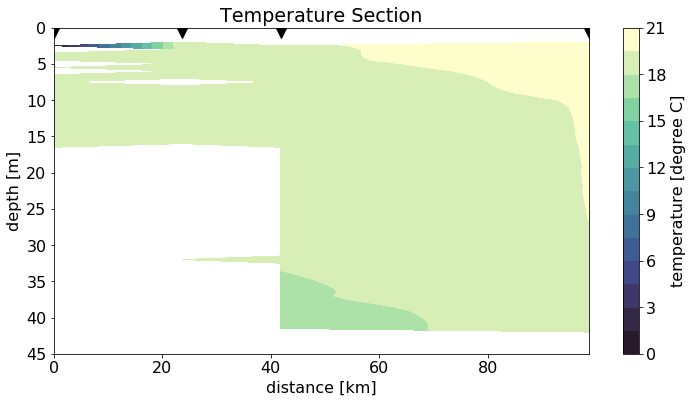

In [34]:
def beautifications(ax):
    ax.plot(ctdsection.distance,ctdsection.distance.size*[0],
             'kv',markersize=20)
    ax.set_ylim(45,0)
#    ax.set_xlim(-.5,10)
    
fig = plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 16})

ax = fig.add_subplot(111)
ctdsection.temperature.plot.contourf('distance','depth',levels=20,cmap=cmocean.cm.deep_r)
beautifications(ax)

plt.title("Temperature Section")

# plt.savefig('Figures/temperaturesection789.png')

Text(0.5, 1.0, 'Salinity Section')

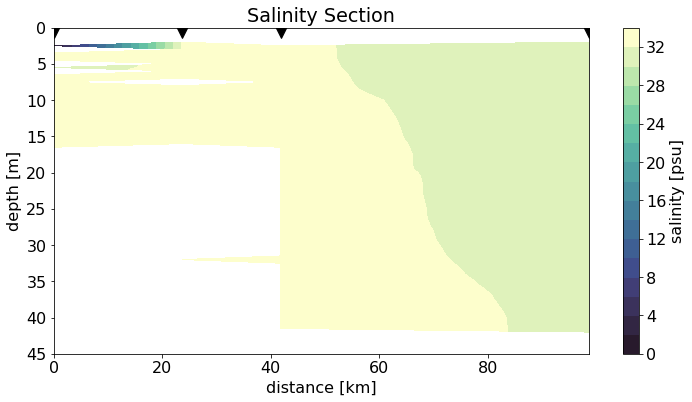

In [35]:
def beautifications(ax):
    ax.plot(ctdsection.distance,ctdsection.distance.size*[0],
             'kv',markersize=20)
    ax.set_ylim(45,0)
#    ax.set_xlim(-.5,45.25)
    
fig = plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 16})

ax = fig.add_subplot(111)
ctdsection.salinity.plot.contourf('distance','depth',levels=20,cmap=cmocean.cm.deep_r)
beautifications(ax)

plt.title("Salinity Section")

#plt.savefig('Figures/salinitysection789.png')